In [4]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = "training_mathbert 4.xlsx"
df = pd.read_excel(file_path)

# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

# Select only the numeric columns (assuming features are numeric)
df_numeric = df.select_dtypes(include=[np.number])

# X as features (all columns except the last one)
X = df_numeric.iloc[:, :-1].values  # Features

# Modify the output column based on the condition (marks > 4 = class 1, else class 0)
y = df_numeric.iloc[:, -1].apply(lambda x: 1 if x > 4 else 0).values  # Binary classification

# Define class labels
class1 = 0
class2 = 1

# Separate the features for each class
X_class1 = X[y == class1]  # Features of class 0
X_class2 = X[y == class2]  # Features of class 1

# Ensure there are samples in both classes before proceeding
if X_class1.size == 0 or X_class2.size == 0:
    print("One of the classes has no samples in the data.")
else:
    # Calculate the mean vectors for both classes
    mean_class1 = np.mean(X_class1, axis=0)
    mean_class2 = np.mean(X_class2, axis=0)

    # Calculate the standard deviation for both classes (intraclass spread)
    std_class1 = np.std(X_class1, axis=0)
    std_class2 = np.std(X_class2, axis=0)

    # Calculate the distance between the mean vectors of both classes (interclass distance)
    interclass_distance = np.linalg.norm(mean_class1 - mean_class2)

    # Calculate the average intraclass spread for each class
    intraclass_spread_class1 = np.mean(std_class1)
    intraclass_spread_class2 = np.mean(std_class2)

    # Print the results
    print(f"Mean vector for class {class1}: {mean_class1}")
    print(f"Standard deviation (intraclass spread) for class {class1}: {std_class1}")
    print(f"Mean vector for class {class2}: {mean_class2}")
    print(f"Standard deviation (intraclass spread) for class {class2}: {std_class2}")

    print(f"\nAverage intraclass spread for class {class1}: {intraclass_spread_class1}")
    print(f"Average intraclass spread for class {class2}: {intraclass_spread_class2}")

    print(f"\nInterclass distance between class {class1} and class {class2}: {interclass_distance}")


Data types of each column:
embed_0      float64
embed_1      float64
embed_2      float64
embed_3      float64
embed_4      float64
              ...   
embed_380    float64
embed_381    float64
embed_382    float64
embed_383    float64
output       float64
Length: 385, dtype: object
Mean vector for class 0: [-0.16178381  0.13812738  0.10226065  0.19516905 -0.48733078 -0.16716397
  0.16517503  0.12113599  0.13878294 -0.04885382  0.22618099 -0.11433163
  0.14412876  0.00944816 -0.09964318  0.13148485 -0.41515558  0.02742206
 -0.44415512 -0.14152168  0.00178163 -0.29995148 -0.26091812  0.00777561
  0.17795761  0.18106569 -0.02567372  0.16905526  0.17460329 -0.06055543
  0.25434797  0.03666954  0.27286814 -0.14568974 -0.02955144 -0.10904295
 -0.14620488  0.24662976  0.06806287  0.11727909  0.00272976  0.09638979
  0.16405689  0.06291964  0.21235495 -0.15924611  0.0166914   0.21707121
  0.08020419 -0.04763618 -0.0405128   0.15303881  0.03554548 -0.13541503
 -0.18983764 -0.04207689 -0.04195

First few rows of the DataFrame:
    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.089926  0.343874  0.176382  0.169358 -0.413337 -0.276315  0.188070   
1  0.303261  0.084930  0.047369 -0.017244 -0.524733 -0.104934  0.335107   
2 -0.274291  0.216801  0.029110  0.259279 -0.655594 -0.289643  0.073369   
3  0.118676  0.095572  0.157358  0.225097 -0.632885 -0.125629  0.204013   
4  0.298772  0.300674  0.366119 -0.022142 -0.748852 -0.035268  0.277504   

    embed_7   embed_8   embed_9  ...  embed_375  embed_376  embed_377  \
0  0.094621  0.330203 -0.258730  ...  -0.272278  -0.230662   0.173143   
1 -0.081476  0.213762 -0.105293  ...  -0.310262  -0.090271   0.129022   
2  0.014463  0.104336 -0.014190  ...  -0.464926  -0.117493  -0.118993   
3  0.074028  0.149310 -0.147779  ...  -0.030543  -0.100965   0.236099   
4  0.075697  0.055439 -0.200804  ...  -0.149575  -0.230057   0.296528   

   embed_378  embed_379  embed_380  embed_381  embed_382  embed_383  output  

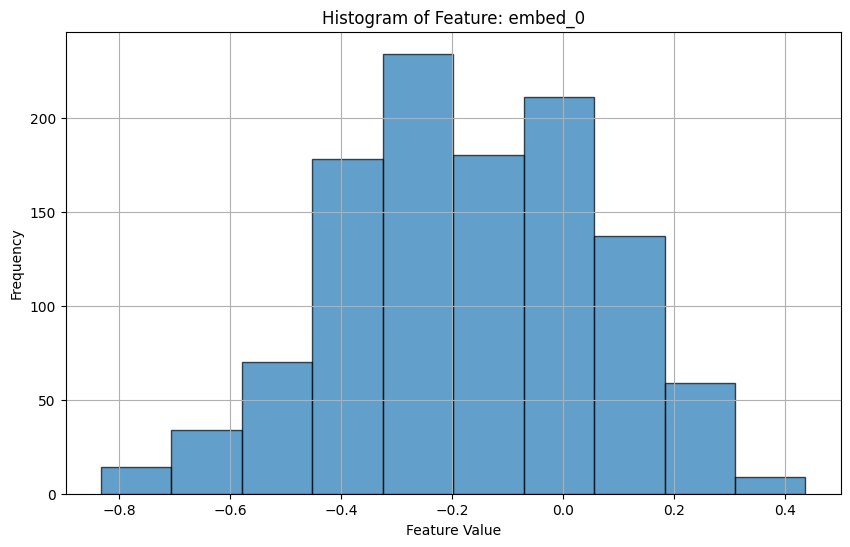

Mean of embed_0: -0.17029445322602035
Variance of embed_0: 0.05343827792925807


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "training_mathbert 4.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Select a feature to analyze (e.g., the first feature in the dataset)
feature_column = df.columns[0]  # Modify this as needed
feature_data = df[feature_column].dropna().values  # Remove missing values

# Calculate histogram data with 10 bins
hist_data, bin_edges = np.histogram(feature_data, bins=10)

# Plot the histogram with 10 bins
plt.figure(figsize=(10, 6))
plt.hist(feature_data, bins=10, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of Feature: {feature_column}')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the mean and variance of the feature
mean_value = np.mean(feature_data)
variance_value = np.var(feature_data)

# Print the mean and variance
print(f"Mean of {feature_column}: {mean_value}")
print(f"Variance of {feature_column}: {variance_value}")


Data types of each column:
embed_0      float64
embed_1      float64
embed_2      float64
embed_3      float64
embed_4      float64
              ...   
embed_380    float64
embed_381    float64
embed_382    float64
embed_383    float64
output       float64
Length: 385, dtype: object


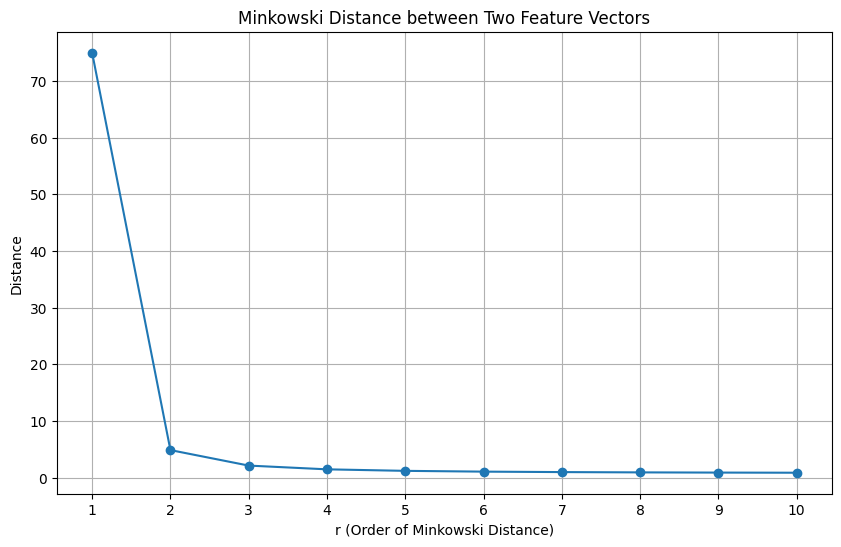

Minkowski Distance with r=1: 74.95742171496386
Minkowski Distance with r=2: 4.853526524381676
Minkowski Distance with r=3: 2.1203722613951492
Minkowski Distance with r=4: 1.4584931354061539
Minkowski Distance with r=5: 1.190435477588291
Minkowski Distance with r=6: 1.0528731355695171
Minkowski Distance with r=7: 0.9721489546673521
Minkowski Distance with r=8: 0.9205544826749266
Minkowski Distance with r=9: 0.8855801677671697
Minkowski Distance with r=10: 0.8608338902669797


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

# Select only the numeric columns (assuming features are numeric)
feature_data = df.select_dtypes(include=[np.number])

# Select two feature vectors (e.g., the first and second rows of the dataset, excluding the output column if necessary)
vector1 = feature_data.iloc[0].values
vector2 = feature_data.iloc[1].values

# Replace NaN values with 0
vector1 = np.nan_to_num(vector1)
vector2 = np.nan_to_num(vector2)

# Define a range for r (from 1 to 10)
r_values = np.arange(1, 11)

# Calculate Minkowski distances for each r value
distances = []
for r in r_values:
    try:
        distance = minkowski(vector1, vector2, p=r)
        distances.append(distance)
    except ValueError as e:
        print(f"Error with r={r}: {e}")
        distances.append(np.nan)

# Plot the Minkowski distances
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r (Order of Minkowski Distance)')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(r_values)
plt.show()

# Print the Minkowski distances for each r
for r, dist in zip(r_values, distances):
    print(f"Minkowski Distance with r={r}: {dist}")


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Inspect the DataFrame
print("DataFrame columns:", df.columns)

# Selecting features and target
try:
    # Replace 'feature1', 'feature2', 'feature3' with actual column names from your dataset
    X = df[['feature1', 'feature2', 'feature3']]
    y = df['target']  # Replace 'target' with the actual name of the target column
except KeyError as e:
    print(f"Column not found: {e}")

# Ensure there are only two classes for binary classification
try:
    classes = y.unique()
    print("Unique classes in target:", classes)
    selected_classes = classes[:2]  # Select the first two unique classes
    df = df[df['target'].isin(selected_classes)]  # Filter the DataFrame for selected classes
    X = df[['feature1', 'feature2', 'feature3']]  # Update X with filtered data
    y = df['target']  # Update y with filtered data
except Exception as e:
    print(f"Error filtering classes: {e}")

# Splitting dataset into training and test sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Test set size: {X_test.shape[0]} samples")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
except Exception as e:
    print(f"Error during train-test split: {e}")


DataFrame columns: Index(['embed_0', 'embed_1', 'embed_2', 'embed_3', 'embed_4', 'embed_5',
       'embed_6', 'embed_7', 'embed_8', 'embed_9',
       ...
       'embed_375', 'embed_376', 'embed_377', 'embed_378', 'embed_379',
       'embed_380', 'embed_381', 'embed_382', 'embed_383', 'output'],
      dtype='object', length=385)
Column not found: "None of [Index(['feature1', 'feature2', 'feature3'], dtype='object')] are in the [columns]"
Error filtering classes: 'numpy.ndarray' object has no attribute 'unique'
Training set size: 788 samples
Test set size: 338 samples
X_train shape: (788, 384)
X_test shape: (338, 384)
y_train shape: (788,)
y_test shape: (338,)


In [11]:
#A5
from sklearn.neighbors import KNeighborsClassifier

# Create the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the model details
print("kNN classifier trained with k=3")


kNN classifier trained with k=3


In [12]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Test the accuracy of the kNN classifier on the test set
accuracy = knn.score(X_test, y_test)

# Print the accuracy of the kNN classifier
print(f"Accuracy of kNN classifier on test set: {accuracy * 100:.2f}%")

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy of kNN classifier on test set: 80.18%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       268
           1       0.52      0.53      0.52        70

    accuracy                           0.80       338
   macro avg       0.70      0.70      0.70       338
weighted avg       0.80      0.80      0.80       338



In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create a kNN classifier instance
neigh = KNeighborsClassifier(n_neighbors=3)  # You can set n_neighbors to any value

# Train the classifier
neigh.fit(X_train, y_train)

# Predict on the test set
y_pred = neigh.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy:.2%}')  # This prints the accuracy as a percentage



Accuracy: 80.18%


In [14]:
#A7
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train kNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Step 3: Predict the class for all test vectors
y_pred = knn.predict(X_test_scaled)

# Print the predicted classes for the test set
print("Predicted classes for the test set:")
print(y_pred)

# Step 4: Predict for a single test vector (for example, the first one)
test_vect = X_test_scaled[0].reshape(1, -1)
pred_class = knn.predict(test_vect)

print(f"Predicted class for the first test vector: {pred_class}")


Predicted classes for the test set:
[0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0]
Predicted class for the first test vector: [0]


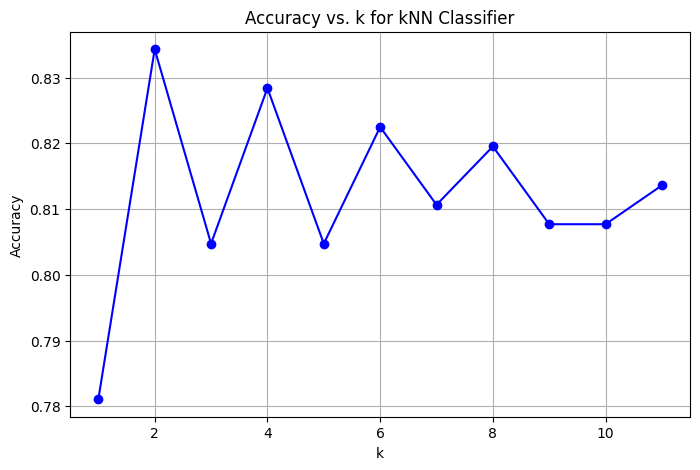

Accuracy for NN (k=1): 0.7811
Accuracy for k=3: 0.8047


In [15]:
#A8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# accuracy scores for different k values
k_values = range(1, 12)  # k=1 to 11
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # prediction
    y_pred = knn.predict(X_test_scaled)

    # accuracy calculation
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

#plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k for kNN Classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Print the accuracy for k=1 (NN) and k=3
print(f"Accuracy for NN (k=1): {accuracy_scores[0]:.4f}")
print(f"Accuracy for k=3: {accuracy_scores[2]:.4f}")


In [16]:
#A9
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on training data
y_train_pred = knn.predict(X_train_scaled)

# Predict on test data
y_test_pred = knn.predict(X_test_scaled)

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Set:")
print(train_conf_matrix)

# Confusion matrix for test data
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Set:")
print(test_conf_matrix)

# Precision, Recall, and F1-Score for training data
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

# Precision, Recall, and F1-Score for test data
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

# Check for underfitting/overfitting
train_accuracy = knn.score(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.1:
    print("Model is likely overfitting (high training accuracy, low test accuracy).")
elif test_accuracy > train_accuracy + 0.1:
    print("Model is likely underfitting (low training accuracy, higher test accuracy).")
else:
    print("Model has a good fit (similar training and test accuracy).")


Confusion Matrix for Training Set:
[[563  31]
 [109  85]]

Confusion Matrix for Test Set:
[[248  20]
 [ 43  27]]

Training Set Metrics:
Precision: 0.7328
Recall: 0.4381
F1-Score: 0.5484

Test Set Metrics:
Precision: 0.5745
Recall: 0.3857
F1-Score: 0.4615

Training Accuracy: 0.8223
Test Accuracy: 0.8136
Model has a good fit (similar training and test accuracy).
